#Identify Pendulum

In [1]:
import sys
sys.path.append('..')

In [2]:
%matplotlib inline  
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [3]:
from ctrl.system.tf import PID
from ctrl.block.linear import Gain, Feedback
from ctrl.block.logger import Logger

In [5]:
from ctrl.client import Controller
HOST, PORT = "192.168.10.104", 9999
#HOST, PORT = "localhost", 9999
controller = Controller(host = HOST, port = PORT)

In [8]:
print(controller.info('all'))

> Controller with 6 signal(s), 4 source(s), 1 sink(s), and 0 filter(s)
> Controller with 6 signal(s), 4 source(s), 1 sink(s), and 0 filter(s)
> signals
  1. clock
  2. encoder1
  3. encoder2
  4. is_running
  5. motor1
  6. pot1
> sources
  1. clock[enabled] >> clock
  2. encoder1[enabled] >> encoder1
  3. encoder2[enabled] >> encoder2
  4. pot1[enabled] >> pot1
> filters
> sinks
  1. motor1 >> motor1[enabled]



In [9]:
controller.reset()
controller.add_sink('logger', 
                    Logger(), 
                    ['clock', 'encoder1', 'motor1', 'encoder2'])

In [10]:
print(controller.info('all'))

> Controller with 6 signal(s), 4 source(s), 2 sink(s), and 0 filter(s)
> Controller with 6 signal(s), 4 source(s), 2 sink(s), and 0 filter(s)
> signals
  1. clock
  2. encoder1
  3. encoder2
  4. is_running
  5. motor1
  6. pot1
> sources
  1. clock[enabled] >> clock
  2. encoder1[enabled] >> encoder1
  3. encoder2[enabled] >> encoder2
  4. pot1[enabled] >> pot1
> filters
> sinks
  1. motor1 >> motor1[enabled]
  2. clock, encoder1, motor1, encoder2 >> logger[enabled]



# Identifying the Friction

In [12]:
controller.set_sink('logger',reset=True)
with controller:
    controller.set_signal('motor1',70)
    time.sleep(.3)    
    controller.set_signal('motor1',0)
    time.sleep(5)
log = controller.read_sink('logger')

In [13]:
t = log[:,0]
phi = log[:,1]
theta = log[:,3]
motor = log[:,2]

thetaDot = np.zeros(t.shape, float)
thetaDot[1:] = (theta[1:]-theta[:-1])/(t[1:]-t[:-1])

phiDot = np.zeros(t.shape, float)
phiDot[1:] = (phi[1:]-phi[:-1])/(t[1:]-t[:-1])

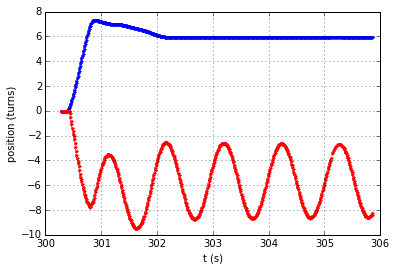

In [14]:
plt.plot(t, phi*180/math.pi, 'b.', t, theta*180/math.pi, 'r.')
plt.xlabel('t (s)')
plt.ylabel('position (turns)')
plt.grid()

In [ ]:
J2 = 0.0000348
wn = 31.25

Td = (4.3-.94)/4
wd = 2*math.pi/Td
zeta = math.sqrt(1-(wd/wn)**2)
print('wd = {:5.3f}, wn = {:5.3f}, zeta = {:5.3f}'.format(wd,wn,zeta))
bTheta = 4*J2*zeta*wn
print('bTheta = {:5.3f}'.format(bTheta))